In [2]:
import numpy as np
import os
import time
import keras
from keras.applications import VGG16
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import decode_predictions
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
import numpy as np
from keras.applications.imagenet_utils import preprocess_input
import os

Using TensorFlow backend.


In [5]:
img_path = 'dataset/covid/covid_test.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
print (x.shape)
x = np.expand_dims(x, axis=0)
print (x.shape)
x = preprocess_input(x)
print('Input image shape:', x.shape)


(224, 224, 3)
(1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)


In [6]:
import os

In [148]:
# Loading the training data
PATH = os.getcwd()
# Define data path
data_path = PATH + '/dataset'
data_dir_list = os.listdir(data_path)

img_data_list=[]

for dataset in data_dir_list:
	img_list=os.listdir(data_path+'/'+ dataset)
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
	for img in img_list:
		img_path = data_path + '/'+ dataset + '/'+ img
		img = image.load_img(img_path, target_size=(224, 224))
		x = image.img_to_array(img)
		x = np.expand_dims(x, axis=0)
		x = preprocess_input(x)
#		x = x/255
		print('Input image shape:', x.shape)
		img_data_list.append(x)

img_data = np.array(img_data_list)
#img_data = img_data.astype('float32')
print (img_data.shape)
img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)
img_data=img_data[0]
print (img_data.shape)


Loaded the images of dataset-covid

Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 224, 3)
Input image shape: (1, 224, 

In [8]:
from keras.utils.np_utils import to_categorical

In [9]:
import keras.utils
from keras import utils as np_utils

In [149]:
# Define the number of classes
num_classes = 2
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:125]=0
labels[125:]=1

names = ['covid','normal']

# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)


In [11]:
from sklearn.utils import shuffle

In [150]:
x,y = img_data,Y
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


In [151]:
# Custom_vgg_model_1
#Training the classifier alone
image_input = Input(shape=(224, 224, 3))

model = VGG16(input_tensor=image_input, include_top=True,weights='imagenet')
model.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [152]:
last_layer = model.get_layer('fc2').output
#x= Flatten(name='flatten')(last_layer)
out = Dense(num_classes, activation='softmax', name='output')(last_layer)
custom_vgg_model = Model(image_input, out)
custom_vgg_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [153]:
for layer in custom_vgg_model.layers[:-1]:
	layer.trainable = False

custom_vgg_model.layers[3].trainable

custom_vgg_model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [154]:
keras.optimizers.Adam(lr=0.001)

In [155]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [156]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

In [157]:
hist = custom_vgg_model.fit(X_train, y_train,callbacks=callbacks, batch_size=14, epochs=50, verbose=1, validation_data=(X_test, y_test))
#(loss, accuracy) = custom_vgg_model.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))
#custom_vgg_model.save('my_model.h5')

Train on 176 samples, validate on 44 samples
Epoch 1/50
176/176 [==============================] - 54s 306ms/step - loss: 0.4921 - accuracy: 0.8068 - val_loss: 0.5336 - val_accuracy: 0.8636
Epoch 2/50
176/176 [==============================] - 53s 299ms/step - loss: 0.1761 - accuracy: 0.9318 - val_loss: 0.5289 - val_accuracy: 0.8409
Epoch 3/50
176/176 [==============================] - 52s 298ms/step - loss: 0.0941 - accuracy: 0.9716 - val_loss: 0.4578 - val_accuracy: 0.9091
Epoch 4/50
176/176 [==============================] - 54s 306ms/step - loss: 0.0433 - accuracy: 0.9830 - val_loss: 0.4769 - val_accuracy: 0.9091
Epoch 5/50
176/176 [==============================] - 52s 293ms/step - loss: 0.0359 - accuracy: 0.9886 - val_loss: 0.4805 - val_accuracy: 0.9091
[INFO] loss=0.0010, accuracy: 100.0000%


In [160]:
results  = custom_vgg_model.evaluate(X_test, y_test, batch_size=12, verbose=1)
print('test loss, test acc:', results)

44/44 [==============================] - 11s 240ms/step
test loss, test acc: [0.48048565739935095, 0.9090909361839294]


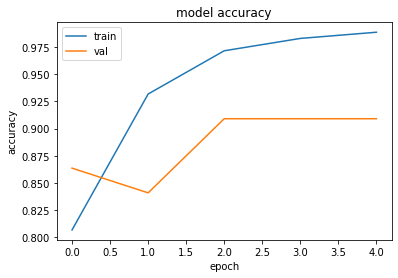

In [161]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

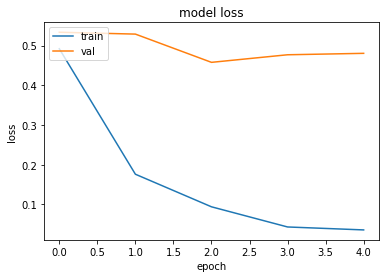

In [162]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [164]:
import cv2
import matplotlib.pyplot as plt

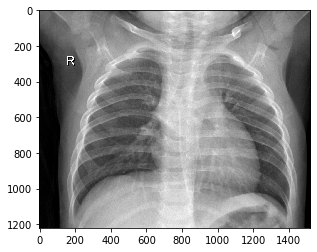

In [171]:
img=cv2.imread('dataset/normal/IM-0214-0001.jpeg')
plt.imshow(img)


In [172]:
img = cv2.resize(img,(224,224))
img = np.reshape(img,[1,224,224,3])

In [173]:
classes = custom_vgg_model.predict(img)

In [174]:
list=classes.flatten()#converting 2d numpy array to 1d array
list

array([0.00353467, 0.9964653 ], dtype=float32)

In [175]:
print("Covid={:.4f}%, Normal: {:.4f}%".format(list[0] * 100, list[1] * 100))

Covid=0.3535%, Normal: 99.6465%


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

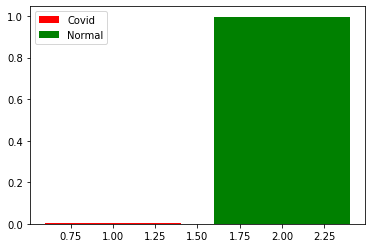

In [176]:
plt.bar(1,list[0], label="Covid", color='r')
plt.bar(2,list[1], label="Normal", color='g')
plt.legend()
plt

In [ ]:
custom_vgg_model.load('best_model.h5')